# **Project: Football Data Analysis**

## Table of Contents

# **Introduction**

---

> This is an extensive dataset of football/soccer teams, players, leagues and matches played for the duration of 2008 to 2016. It is a dataset suited for machine learning but I am just performing exploratory data analysis with it. As a result, I will not be making use of a lot of the data from this dataset.
> 
> After studying the tables, I have come up with some questions that I plan to explore:
> 
> 1. 

# **Loading The Data**

---


### Importing all modules and packages that will be used


In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3
from sqlalchemy import create_engine

import pprint

%matplotlib inline

### Connecting to the SQLite database


In [249]:
# This code connects to the database through sqlite3
# This enables the database to be queried with traditional SQL code
load = sqlite3.connect('database.sqlite')
cursor = load.cursor()

# This code connects to the database through sqlalchemy
# This enables the database tables to be stored in a pandas dataframe and analyzed with python code and packages
engine = create_engine('sqlite:///database.sqlite')


### Listing all tables in the database


In [250]:
# This code checks the database to list all tables inside
cursor.execute('SELECT name from sqlite_master where type= "table"')
pprint.pprint(cursor.fetchall())


[('sqlite_sequence',),
 ('Player_Attributes',),
 ('Player',),
 ('Match',),
 ('League',),
 ('Country',),
 ('Team',),
 ('Team_Attributes',)]


> Even though the above list contains 8 tables, there are actually 7 tables in the database. The first table `sqlite_sequence` is automatically generated by [SQLite](https://www.sqlite.org/autoinc.html#:~:text=The%20sqlite_sequence%20table%20is%20created,%2C%20INSERT%2C%20and%20DELETE%20statements.) to keep track of the other tables.


### Creating dataframes for each of the 7 tables


In [251]:
df_league = pd.read_sql_table("League", engine)
df_player = pd.read_sql_table("Player", engine)
df_match = pd.read_sql_table("Match", engine)
df_country = pd.read_sql_table("Country", engine)
df_team = pd.read_sql_table("Team", engine)
df_team_attr = pd.read_sql_table("Team_Attributes", engine)
df_player_attr = pd.read_sql_table("Player_Attributes", engine)

# cursor.close()


_From this point on, I try to run my analysis in both Python and SQL code._


# **Wrangling The Data**

---


## **1. `Match` Table**


In [252]:
df_match.head()


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


### Removing Columns

> The `Match` table is very large and contains many columns which I would not need for my current analysis (especially the betting odds columns), some columns are missing all their values and some columns are not explained in the documentation so I don't know what they represent. I drop all irrelevant columns.
>
> I will be removing:
>
> 1. all columns that have **player** in their name, because I do not know what those numbers represent and it is not explained on the documentation
> 2. all the betting odds columns at the right side of the table, because I am not using them for my analysis
> 3. all the match statistics colummns (except the goals scored), because the values are not available in the dataset, they are all missing


In [253]:
# Listing all column names in the `match` table so I can know the index of the columns to be deleted
list(enumerate(df_match.columns, start=0))

[(0, 'id'),
 (1, 'country_id'),
 (2, 'league_id'),
 (3, 'season'),
 (4, 'stage'),
 (5, 'date'),
 (6, 'match_api_id'),
 (7, 'home_team_api_id'),
 (8, 'away_team_api_id'),
 (9, 'home_team_goal'),
 (10, 'away_team_goal'),
 (11, 'home_player_X1'),
 (12, 'home_player_X2'),
 (13, 'home_player_X3'),
 (14, 'home_player_X4'),
 (15, 'home_player_X5'),
 (16, 'home_player_X6'),
 (17, 'home_player_X7'),
 (18, 'home_player_X8'),
 (19, 'home_player_X9'),
 (20, 'home_player_X10'),
 (21, 'home_player_X11'),
 (22, 'away_player_X1'),
 (23, 'away_player_X2'),
 (24, 'away_player_X3'),
 (25, 'away_player_X4'),
 (26, 'away_player_X5'),
 (27, 'away_player_X6'),
 (28, 'away_player_X7'),
 (29, 'away_player_X8'),
 (30, 'away_player_X9'),
 (31, 'away_player_X10'),
 (32, 'away_player_X11'),
 (33, 'home_player_Y1'),
 (34, 'home_player_Y2'),
 (35, 'home_player_Y3'),
 (36, 'home_player_Y4'),
 (37, 'home_player_Y5'),
 (38, 'home_player_Y6'),
 (39, 'home_player_Y7'),
 (40, 'home_player_Y8'),
 (41, 'home_player_Y9'),
 (

In [254]:
# Creating a function to store all columns that will be removed from the Match table
def match_columns_to_delete():
    # Storing the table columns in a variable
    match_columns = df_match.columns

    # Creating a list of all columns to be deleted
    # match_columns_to_delete = [head for head in match_columns if head.find('player')>0 or head.find('365')>0 or len(head)==3]
    match_columns_to_delete = match_columns[11:]

    # Confirming changes
    return match_columns_to_delete


In [255]:
# Dropping unwanted columns
df_match.drop(columns=match_columns_to_delete(), inplace=True)


In [256]:
# Confirming changes
df_match.head()


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


### Reorganizing The Table
> Here I will be making the following changes:
> 1. Join the `team_api_id` from 2 columns to one column. 
> 2. Join `team_goals` from 2 columns to one column
>
>I will achieve this by making 2 seperate tables, one for home and one for away. Then joining the tables at the end.

In [257]:
# Creating a table for home team by dropping away team columns
df_match_h = df_match.drop(columns=['away_team_api_id', 'away_team_goal'])

# Adding a column to specifty these are home matches
df_match_h['side'] = 'home'

# Renaming the columns since I've seperated the home and away matches
df_match_h.rename(columns={'home_team_api_id':'team_api_id', 'home_team_goal':'team_goal'}, inplace = True)

df_match_h

,id,country_id,league_id,season,stage,date,match_api_id,team_api_id,team_goal,side
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,1,home
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,0,home
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,0,home
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,5,home
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,1,home
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,1,home
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,1,home
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,2,home
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,0,home


In [258]:
# Creating a table for away team by dropping home team columns
df_match_a = df_match.drop(columns=['home_team_api_id', 'home_team_goal'])

# Adding a column to specifty these are away matches
df_match_a['side'] = 'away'

# Renaming the columns since I've seperated the home and away matches
df_match_a.rename(columns={'away_team_api_id':'team_api_id', 'away_team_goal':'team_goal'}, inplace = True)

df_match_a

,id,country_id,league_id,season,stage,date,match_api_id,team_api_id,team_goal,side
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9993,1,away
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,9994,0,away
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,8635,3,away
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9998,0,away
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,9985,3,away
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10191,0,away
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,10199,2,away
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,10179,0,away
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,10243,0,away


### Joining the tables

In [259]:
# Joining the 2 tables and storing the dataframe in a new table so that the original table is still there for reference purposes
df_match_ed = pd.concat([df_match_h, df_match_a])

# Confirming changes
df_match_ed

,id,country_id,league_id,season,stage,date,match_api_id,team_api_id,team_goal,side
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,1,home
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,0,home
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,0,home
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,5,home
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,1,home
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10191,0,away
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,10199,2,away
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,10179,0,away
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,10243,0,away


### Adding Columns
> Here I will be making changes to the table by doing the following:
> 1. Adding the country names by referencing the country table
> 2. Adding the league names by referencing the league table
> 3. Adding the team names by referencnig the team table
> 
> Lets take start with the Country table

In [260]:
df_country.head(2)

,id,name
0,1,Belgium
1,1729,England


> The `id` column is the foreign key I will be using to get the country names that will be inserted to the match table so I will need to change the `id` column name to match with the `country_id` column in the edited match table so that they have the same column name

In [261]:
# Renaming the columns
df_country.rename(columns={'id':'country_id', 'name':'country'}, inplace=True)

# Confirming changes
df_country

,country_id,country
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [262]:
# Merging the tables using a left-join
df_match_ed = pd.merge(df_match_ed, df_country, on='country_id', how='left')

# Confirming changes
df_match_ed.head()

,id,country_id,league_id,season,stage,date,match_api_id,team_api_id,team_goal,side,country
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,1,home,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,0,home,Belgium
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,0,home,Belgium
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,5,home,Belgium
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,1,home,Belgium


> Next I check the league table

In [263]:
df_league.head(2)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


> Again the `id` column is the foreign key I will be using to get the league names that will be inserted to the match table so I will need to change the `id` column name to match with the `league_id` column in the edited match table so that they have the same column name

In [264]:
# Renaming the columns
df_league.rename(columns={'id':'league_id', 'name':'league'}, inplace=True)

# Confirming changes
df_league.head(2)

,league_id,country_id,league
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


In [265]:
# Merging the tables using a left-join
df_match_ed = pd.merge(df_match_ed, df_league, on='league_id', how='left')

# Confirming changes
df_match_ed.head()

,id,country_id_x,league_id,season,stage,date,match_api_id,team_api_id,team_goal,side,country,country_id_y,league
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,1,home,Belgium,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,0,home,Belgium,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,0,home,Belgium,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,5,home,Belgium,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,1,home,Belgium,1,Belgium Jupiler League


> Some extra columns were created because the match table and the league table both have a column for `country_id` but that will not be a problem as I will be dropping those columns soon.
>
> Now lets check the team table.

In [266]:
df_team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


> Here the foreign key `team_api_id` is the same as the Match table so I'll only be changing the team name column. I will be working with the team's full name (not the short name).

In [267]:
# Renaming the columns
df_team.rename(columns={'team_long_name':'team'}, inplace=True)

# Confirming changes
df_team.head(2)

,id,team_api_id,team_fifa_api_id,team,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC


In [268]:
# Merging the tables using a left-join
df_match_ed = pd.merge(df_match_ed, df_team, on='team_api_id', how='left')

# Confirming changes
df_match_ed.head()

,id_x,country_id_x,league_id,season,stage,date,match_api_id,team_api_id,team_goal,side,country,country_id_y,league,id_y,team_fifa_api_id,team,team_short_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,1,home,Belgium,1,Belgium Jupiler League,1,673.0,KRC Genk,GEN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,0,home,Belgium,1,Belgium Jupiler League,3,15005.0,SV Zulte-Waregem,ZUL
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,0,home,Belgium,1,Belgium Jupiler League,5,1750.0,KSV Cercle Brugge,CEB
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,5,home,Belgium,1,Belgium Jupiler League,7,674.0,KAA Gent,GEN
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,1,home,Belgium,1,Belgium Jupiler League,9,NaN,FCV Dender EH,DEN


> The tables have been merged and it joined all the columns from the other tables. Now I will be dropping all unwanted columns.

In [269]:
# Dropping the columns
df_match_ed.drop(columns=['id_x', 'country_id_x', 'league_id', 'match_api_id', 'team_api_id', 'country_id_y', 'id_y', 'team_fifa_api_id', 'team_short_name'], inplace=True)

# Confirming changes
df_match_ed

,season,stage,date,team_goal,side,country,league,team
0,2008/2009,1,2008-08-17 00:00:00,1,home,Belgium,Belgium Jupiler League,KRC Genk
1,2008/2009,1,2008-08-16 00:00:00,0,home,Belgium,Belgium Jupiler League,SV Zulte-Waregem
2,2008/2009,1,2008-08-16 00:00:00,0,home,Belgium,Belgium Jupiler League,KSV Cercle Brugge
3,2008/2009,1,2008-08-17 00:00:00,5,home,Belgium,Belgium Jupiler League,KAA Gent
4,2008/2009,1,2008-08-16 00:00:00,1,home,Belgium,Belgium Jupiler League,FCV Dender EH
...,...,...,...,...,...,...,...,...
51953,2015/2016,9,2015-09-22 00:00:00,0,away,Switzerland,Switzerland Super League,FC Thun
51954,2015/2016,9,2015-09-23 00:00:00,2,away,Switzerland,Switzerland Super League,FC Luzern
51955,2015/2016,9,2015-09-23 00:00:00,0,away,Switzerland,Switzerland Super League,FC Sion
51956,2015/2016,9,2015-09-22 00:00:00,0,away,Switzerland,Switzerland Super League,FC Zürich


### Check for duplicate rows

In [270]:
# Checking for duplicate rows
df_match_ed.duplicated().sum()

3

In [271]:
# Having a look at all the duplicates
df_match_ed[df_match_ed.duplicated(keep=False)]

,season,stage,date,team_goal,side,country,league,team
16347,2010/2011,26,2011-05-10 00:00:00,1,home,Poland,Poland Ekstraklasa,Polonia Bytom
16350,2010/2011,26,2011-05-10 00:00:00,1,home,Poland,Poland Ekstraklasa,Polonia Bytom
16409,2010/2011,6,2010-09-18 00:00:00,1,home,Poland,Poland Ekstraklasa,Polonia Bytom
16415,2010/2011,6,2010-09-18 00:00:00,1,home,Poland,Poland Ekstraklasa,Polonia Bytom
42317,2010/2011,25,2011-05-07 00:00:00,0,away,Poland,Poland Ekstraklasa,Polonia Bytom
42323,2010/2011,25,2011-05-07 00:00:00,0,away,Poland,Poland Ekstraklasa,Polonia Bytom


In [272]:
# Dropping duplicates since there are only 3
df_match_ed = df_match_ed.drop_duplicates()

# Confirming changes
df_match_ed.duplicated().sum()

0

### Check for null values

In [273]:
# Checking for null values
df_match_ed.isnull().sum()

season       0
stage        0
date         0
team_goal    0
side         0
country      0
league       0
team         0
dtype: int64

### Final check

In [274]:
df_match_ed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51955 entries, 0 to 51957
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   season     51955 non-null  object
 1   stage      51955 non-null  int64 
 2   date       51955 non-null  object
 3   team_goal  51955 non-null  int64 
 4   side       51955 non-null  object
 5   country    51955 non-null  object
 6   league     51955 non-null  object
 7   team       51955 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.6+ MB


## **2. `Player` Table**

In [275]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182,154


> I don't need the `player_fifa_api_id` column so I drop it

In [276]:
# Dropping column
df_player_ed = df_player.drop(columns=['player_fifa_api_id'])


In [277]:
# Confirming changes
df_player_ed.head()

,id,player_api_id,player_name,birthday,height,weight
0,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182,187
1,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170,146
2,3,162549,Aaron Doran,1991-05-13 00:00:00,170,163
3,4,30572,Aaron Galindo,1982-05-08 00:00:00,182,198
4,5,23780,Aaron Hughes,1979-11-08 00:00:00,182,154


> I would like to add player attributes to this table from the `player attributes` table so lets have a look at the table

In [278]:
df_player_attr.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


> There are many columns in this table that I will not be using for my analysis so I will be droopping them. I will only be choosing a few player attribures and dropping the rest. The attributes I will be keeping are: `overall_rating, preferred_foot, finishing, acceleration, sprint_speed and stamina`.

In [291]:
# Creating a function to store all columns that will be removed
def player_columns_to_remove():
    player_attr_columns = list(df_player_attr.columns)
    player_attr_columns_to_keep = ['player_api_id', 'date', 'overall_rating', 'preferred_foot', 'finishing', 'acceleration', 'sprint_speed', 'stamina']
    [player_attr_columns.remove(x) for x in player_attr_columns_to_keep]
    return player_attr_columns

In [280]:
# Dropping columns
df_player_attr.drop(columns=player_columns_to_remove(), inplace=True)

# Confirming changes
df_player_attr.head(2)

,player_api_id,date,overall_rating,preferred_foot,finishing,acceleration,sprint_speed,stamina
0,505942,2016-02-18 00:00:00,67.0,right,44.0,60.0,64.0,54.0
1,505942,2015-11-19 00:00:00,67.0,right,44.0,60.0,64.0,54.0
2,505942,2015-09-21 00:00:00,62.0,right,44.0,60.0,64.0,54.0
3,505942,2015-03-20 00:00:00,61.0,right,43.0,60.0,64.0,54.0
4,505942,2007-02-22 00:00:00,61.0,right,43.0,60.0,64.0,54.0
...,...,...,...,...,...,...,...,...
183973,39902,2009-08-30 00:00:00,83.0,right,77.0,66.0,72.0,72.0
183974,39902,2009-02-22 00:00:00,78.0,right,76.0,66.0,67.0,66.0
183975,39902,2008-08-30 00:00:00,77.0,right,71.0,66.0,67.0,66.0
183976,39902,2007-08-30 00:00:00,78.0,right,64.0,61.0,60.0,67.0


### Final check

In [281]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11060 non-null  int64 
 1   player_api_id       11060 non-null  int64 
 2   player_name         11060 non-null  object
 3   player_fifa_api_id  11060 non-null  int64 
 4   birthday            11060 non-null  object
 5   height              11060 non-null  int64 
 6   weight              11060 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 605.0+ KB


# **4. `Team Attributes` Table**

---


In [282]:
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

Again, I will drop the `team_fifa_api_id` column

In [283]:
# Dropping column
df_team_attr.drop(columns=['team_fifa_api_id'], inplace=True)

In [284]:
# Confirming changes
df_team_attr.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


### Adding columns
> Now I will be adding a column for `year` so that I can aggregte each teams attribute by year

In [285]:
# Creating a column and extracting the year from the date column 
df_team_attr['year'] = df_team_attr['date'].apply(lambda x: x[0:4]).astype(int)

# Confirming changes
df_team_attr.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,year
0,1,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,2010
1,2,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2014
2,3,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2015
3,4,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,2010
4,5,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,...,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,2011


> I plan to add some columns to the `team` table from this table so I will be aggregating the table by the average attributes of each team for each year

In [286]:
table = df_team_attr.groupby(['team_api_id', 'year']).mean()
table.head(50)

id  buildUpPlaySpeed  buildUpPlayDribbling  \
team_api_id year                                                   
1601        2010  1113.0              30.0                   NaN   
            2011  1114.0              48.0                   NaN   
            2012  1115.0              53.0                   NaN   
            2013  1116.0              53.0                   NaN   
            2014  1117.0              53.0                  48.0   
            2015  1118.0              47.0                  48.0   
1773        2012   941.0              52.0                   NaN   
            2013   942.0              52.0                   NaN   
            2014   943.0              52.0                  51.0   
1957        2010   619.0              30.0                   NaN   
            2011   620.0              33.0                   NaN   
            2012   621.0              58.0                   NaN   
            2013   622.0              58.0                   NaN   
            2014   623.0              38.0                  54.0   
            2015   624.0              66.0                  54.0   
2033        2010   928.0              45.0                   NaN   
            2011   929.0              65.0                   NaN   
            2012   930.0              45.0                   NaN   
            2013   931.0              45.0                   NaN   
            2014   932.0              45.0                  62.0   
2182        2010   695.0              40.0                   NaN   
            2011   696.0              64.0                   NaN   
            2012   697.0              67.0                   NaN   
            2013   698.0              67.0                   NaN   
            2014   699.0              67.0                  55.0   
            2015   700.0              57.0                  50.0   
2183        2010   998.0              30.0                   NaN   
            2011   999.0              33.0                   NaN   
            2012  1000.0              34.0                   NaN   
            2013  1001.0              34.0                   NaN   
2186        2010   331.0              30.0                   NaN   
            2011   332.0              46.0                   NaN   
            2012   333.0              57.0                   NaN   
            2014   334.0              37.0                  50.0   
            2015   335.0              37.0                  50.0   
4087        2011   411.0              35.0                   NaN   
            2012   412.0              53.0                   NaN   
            2013   413.0              53.0                   NaN   
            2014   414.0              61.0                  51.0   
            2015   415.0              58.0                  35.0   
4170        2010   222.0              45.0                   NaN   
            2011   223.0              50.0                   NaN   
            2012   224.0              49.0                   NaN   
6269        2011   911.0              53.0                   NaN   
            2012   912.0              55.0                   NaN   
            2013   913.0              66.0                   NaN   
            2014   914.0              66.0                  57.0   
6351        2011   404.0              50.0                   NaN   
6391        2013   509.0              61.0                   NaN   
            2015   510.0              48.0                  53.0   

                  buildUpPlayPassing  chanceCreationPassing  \
team_api_id year                                              
1601        2010                40.0                   50.0   
            2011                51.0                   68.0   
            2012                55.0                   44.0   
            2013                55.0                   44.0   
            2014                38.0                   66.0   
            2015                38.0        

> I notice that there is incomplete data for some teams. Some teams have missing data for some years. So I descide to create tables for each year and seperate the team data into the year they fall on

In [287]:
year_10 = df_team_attr[df_team_attr.year == 2010]
year_11 = df_team_attr[df_team_attr.year == 2011]
year_12 = df_team_attr[df_team_attr.year == 2012]
year_13 = df_team_attr[df_team_attr.year == 2013]
year_14 = df_team_attr[df_team_attr.year == 2014]
year_15 = df_team_attr[df_team_attr.year == 2015]
year_10.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,year
0,1,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,2010
3,4,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,2010
9,10,8576,2010-02-22 00:00:00,60,Balanced,NaN,Little,40,Mixed,Organised,...,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap,2010
15,16,8564,2010-02-22 00:00:00,45,Balanced,NaN,Little,30,Short,Free Form,...,Lots,Free Form,30,Deep,35,Press,60,Normal,Offside Trap,2010
21,22,10215,2010-02-22 00:00:00,30,Slow,NaN,Little,30,Short,Organised,...,Normal,Organised,30,Deep,30,Contain,30,Narrow,Offside Trap,2010


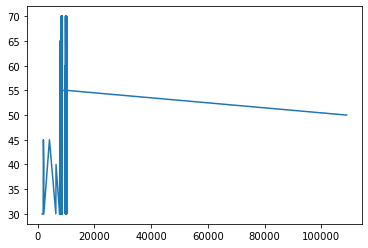

In [288]:
tab = year_10.groupby(['team_api_id']).mean()
plt.plot(tab['buildUpPlaySpeed'])


# **Conclusions**

---

> The dataset is not very well explained in the documentation and there are many columns in come of the tables which I do not know what they represent so I drop them and try to reduce the tables to something I can work with.

# Misc queries

In [289]:
# df_team_attr.sort_values(by='team_api_id')

# df_team.query('team_long_name == "Manchester City"')
# df_team[df_team['team_long_name'] == 'Manchester City']
# df_team[df_team.team_long_name == 'Manchester City']

# df_team.query('team_fifa_api_id.isnull()')

# cursor.execute(""
#                "SELECT * FROM Team WHERE team_fifa_api_id is Null"""
#                )
# pprint.pprint(cursor.fetchall())

# df_match_ed[df_match_ed.home_team_api_id == 8456]


In [290]:
# SQLite query to filter the match to return all Manchester City matches played in 2015 

# cursor.execute(""
#                "SELECT * FROM Match WHERE home_team_api_id=8456 AND SUBSTR(date, 1, 4) = '2015' """
#                )
# pprint.pprint(cursor.fetchone())